# Curve fitting with Genetic Algorithm

## Introduction

In this project we want to solve curve fitting problem with genetic algoritm

## Part 1: Define basic concepts and definitions

We have to defien gene and chromosome: <br>
We defien each coefficient as gene and the pack of genes from 0 to n that match coefficient 0 to n as chromosome. <br>
A chromosome is a solution for the problem that gives us coefficients 0 to n for the curve. <br> <br>
For example [n0, n1, n2, n3, n4] is a chromosome that matchs with y = n4 * x^4 + n3 * x^3 + n2 * x^2 + n1 * x^1 + n0

### Import liberies

For reading given points we import pandas. <br>
For generating random numbers we import random. <br>
For plotting result we import matplotlib.

In [14]:
import pandas as pd
import random
import matplotlib.pyplot as plt

We have to define fitness funtion.<br>
Fitness definition for given coefficients: Sum of the square of the differences between given y and calculated y with applying the coefficients.<br>
Here the goal is to minimize the fitness.

In [15]:
# defining the fitness function
def fitness (n, coefs, points):
    result = 0

    for i in range (len (points)):
        y_predict = 0

        for j in range (n):
            y_predict = y_predict + (coefs[j] * (points[i][0] ** j))
        
        error = points[i][1] - y_predict
        result = result + (error ** 2)
    
    return result

Now, we define crossover functions. <br>
First one, We select one gene and swap the tails between the parents.

In [16]:
# defien crossover function with one cut point
def crossover (parent1, parent2):
    index = random.randint (0, len (parent1) - 1)

    child1 = parent1[:index] + parent2[index:]
    child2 = parent2[:index] + parent2[index:]

    return child1, child2

Seccond one, we select two indices and swap that part between two parents

In [17]:
# define crossover function with two cut points
def crossover2 (parent1, parent2):
    num1 = random.randint (0, len (parent1) - 1)
    num2 = random.randint (0, len (parent1) - 1)

    if (num1 <= num2):
        index1 = num1
        index2 = num2
    else:
        index1 = num2
        index2 = num1
    
    child1 = parent1[:index1] + parent2[index1:index2 + 1] + parent1[index2 + 1:]
    child2 = parent2[:index1] + parent1[index1:index2 + 1] + parent2[index2 + 1:]

    return child1, child2

We define mutation function: we change each gene of the chromosome with probality p.

In [18]:
# define mutation function
def mutation (ch, p, min_c, max_c):
    for i in range (len (ch)):
        s = random.choices ([0, 1], [p, 1 - p])

        if (s[0] == 0):
            ch[i] = random.randint (min_c, max_c)
        
    return ch

We define poly function for finding y with give coefficients.

In [19]:
# define poly function for calculatng values of y
def poly (x, coeffs):
    y = 0
    
    for i in range (len (coeffs)):
        y = y + (coeffs[i] * (x ** i))
    
    return y

Now, we get the inputs and the points and save them

In [20]:
# getting inputs
n = int (input ())

df = pd.read_csv ("points.csv")

df = df.sort_values (by= "x")

x_points = df["x"].tolist ()
y_points = df["y"].tolist ()
points = []

n = n + 1

for i in range (len (x_points)):
    points = points + [[x_points[i], y_points[i]]]

2


We have to define some parameters, these parameters must be defined by a expert.

In [21]:
# define parameters
first_population_number = 1024
minimum_guess = -5
maximum_guess = 5
p_mutation = 0.01
repeat_times = 500
stop_fitness = 0

## Part 2: Generating first population

We generate first population with size of first_population_number and find fitness.

In [22]:
population = []

# generate first population
for i in range (first_population_number):
    chromosome = []

    for j in range (n):
        coef = random.randint (minimum_guess, maximum_guess)
        chromosome.append (coef)
    
    population = population + [[0, chromosome]]

for i in range (len (population)):
    f = fitness (n, population[i][1], points)

    population[i][0] = f

population2 = population.copy ()
repeat_times2 = repeat_times

## Part 3: Implementation and creating the next generations

Now, we implement the genetic algorithm and make nest generation.<br>
First, we sort the population and then delete the soccend half of it. After that we apply crossover function and mutation function for chromosome. Fom two parents, two children are be created, so the size of the next generation equals to the previous one. If a chromosome with fitness less than or equal to the stop_fitness is created, We will stop the algoritm. We repeat this repeat_times times. After finishing, the chromosome with the lowest fitness is the answer

In [23]:
# find the result with crossover1 function
while (repeat_times > 0):
    population.sort (key= lambda x: x[0])

    if (population[0][0] <= stop_fitness):
        break

    population = population[:len (population) // 2]
    
    index_list = list (range (len (population)))

    while (len (index_list) > 1):
        parent1_index = random.choice (index_list)
        index_list.remove (parent1_index)

        parent2_index = random.choice (index_list)
        index_list.remove (parent2_index)

        child1, child2 = crossover (population[parent1_index][1], population[parent2_index][1])

        child1 = mutation (child1, p_mutation, minimum_guess, maximum_guess)
        child2 = mutation (child2, p_mutation, minimum_guess, maximum_guess)

        population = population + [[0, child1]]
        population = population + [[0, child2]]

    for i in range (len (population)):
        f = fitness (n, population[i][1], points)

        population[i][0] = f
    
    repeat_times = repeat_times - 1

population.sort (key= lambda x: x[0])

result = population[0]

fitness_result = result[0]
chromosome_result = result[1]

## Part 4: Print and plot the result

Now, we print the result and plot it

coefficient:  [1, 2, 1]
fitness:  1


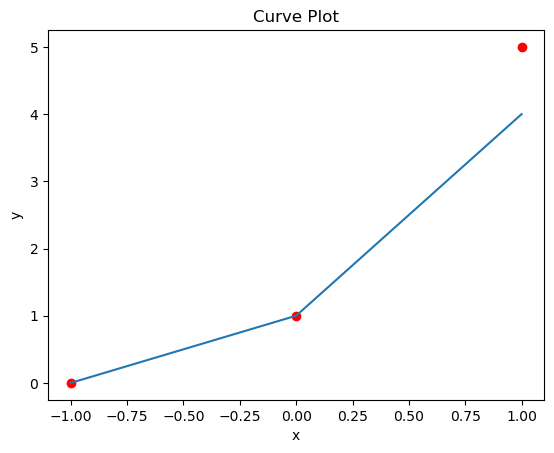

In [24]:
# show the result
print ("coefficient: ", chromosome_result)
print ("fitness: ", fitness_result)

plt.scatter (x_points, y_points, color= "red")

x = list (range (min (x_points), max (x_points) + 1))

y = []

for i in range (len (x)):
    y.append (poly (x[i], chromosome_result))

plt.plot (x, y)

plt.title ("Curve Plot")
plt.xlabel ("x")
plt.ylabel ("y")

plt.show ()

Now, we repeat the algorithm with seccond crossover function

In [12]:
# find result with crossover2 function
while (repeat_times2 > 0):
    population2.sort (key= lambda x: x[0])

    if (population2[0][0] <= stop_fitness):
        break

    population2 = population2[:len (population2) // 2]
    
    index_list = list (range (len (population2)))

    while (len (index_list) > 1):
        parent1_index = random.choice (index_list)
        index_list.remove (parent1_index)

        parent2_index = random.choice (index_list)
        index_list.remove (parent2_index)

        child1, child2 = crossover2 (population2[parent1_index][1], population2[parent2_index][1])

        child1 = mutation (child1, p_mutation, minimum_guess, maximum_guess)
        child2 = mutation (child2, p_mutation, minimum_guess, maximum_guess)

        population2 = population2 + [[0, child1]]
        population2 = population2 + [[0, child2]]

    for i in range (len (population2)):
        f = fitness (n, population2[i][1], points)

        population2[i][0] = f
    
    repeat_times2 = repeat_times2 - 1

population2.sort (key= lambda x: x[0])

result2 = population2[0]

fitness_result2 = result2[0]
chromosome_result2 = result2[1]

coefficient:  [12, -4, 2, 0]
fitness:  0


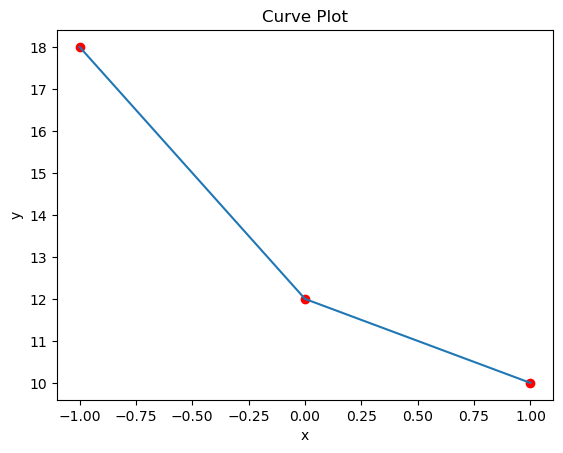

In [13]:
# show result
print ("coefficient: ", chromosome_result)
print ("fitness: ", fitness_result)

plt.scatter (x_points, y_points, color= "red")

x = list (range (min (x_points), max (x_points) + 1))

y2 = []

for i in range (len (x)):
    y2.append (poly (x[i], chromosome_result2))

plt.plot (x, y2)

plt.title ("Curve Plot")
plt.xlabel ("x")
plt.ylabel ("y")

plt.show ()

## Conclusion

Genetic algorithm one of the good way for solving curve fitting problem. It seems using 2 cut points crossover function give us a better result. But there are better ways for solving curve fitting in supervised learning.

## Questions

1- If first population size is very small: Diversity can be limited and not to able find the solution - Convergence can happen very fast but not to optomal solution and stop searching for optimal solution - It can get stuck in local optima. <br>
If first population size is very large: It can use more resources like memory and power - It takes a long time to converge - It needs more computation - It can cause overfitting. <br><br>
2- Accuracy can be increase and the speed can be increase. <br><br>
3- Crossover exchanges genes between parents and creates chromosomes that are more likely better than parents and it is necessary for convergance. Mutation adds to diversity. Crossover is more necessary. We can use just crossover, but it causes less accuracy, because crossover causes convergance. <br><br>
4- We can set an stop fitness that when a solution with that or less is generated, it will stop. <br><br>
5- Because the population converges and it won't change and it cause useless computation and it may reached not optimal solution. we can check at each time if it converged or not, we can increase first population size and we can increase mutation probabillity. <br><br>
6- After a specific time if it don't converge, we will stop it. <br><br>
7- It increases. <br><br>
8- Increasing number of points can increase accuracy and converge faster.